In [1]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Part 1: Heatmaps

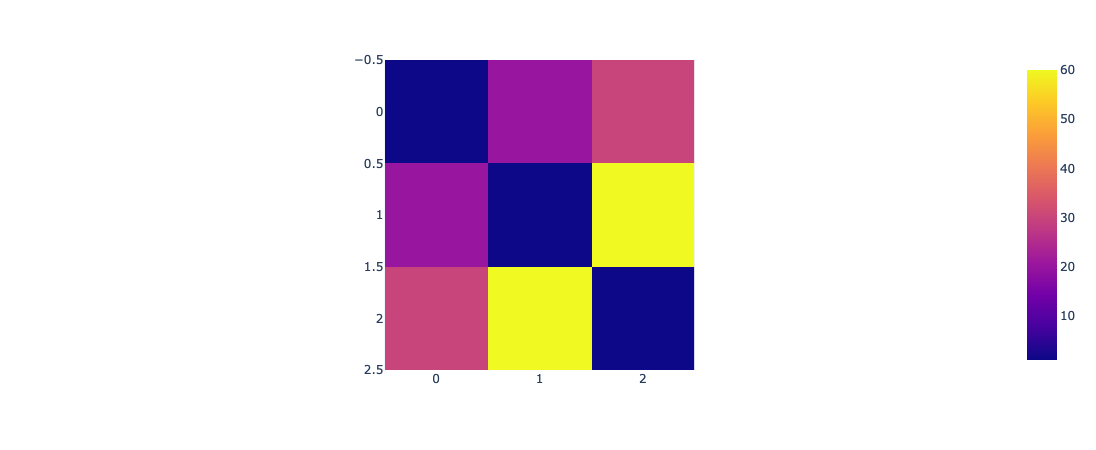

In [2]:
import plotly.express as px

fig = px.imshow([[1, 20, 30],
                 [20, 1, 60],
                 [30, 60, 1]])
fig.show()


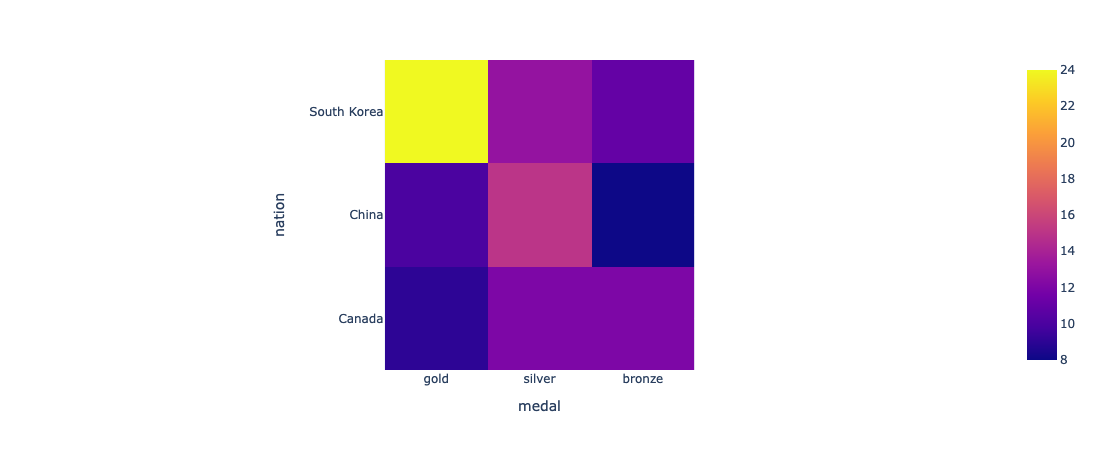

In [3]:
import plotly.express as px

df = px.data.medals_wide(indexed=True)
fig = px.imshow(df)
fig.show()

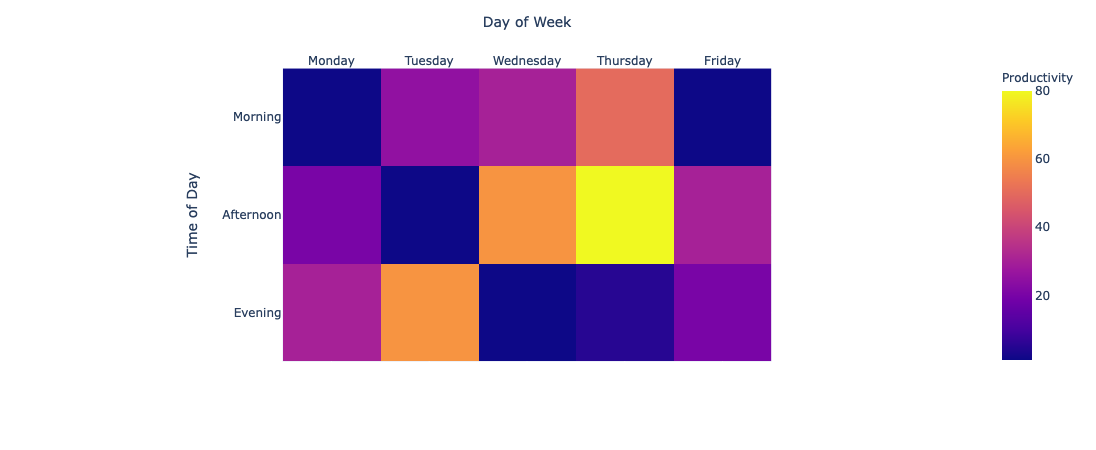

In [4]:
import plotly.express as px
data=[[1, 25, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, 5, 20]]
fig = px.imshow(data,
                labels=dict(x="Day of Week", y="Time of Day", color="Productivity"),
                x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                y=['Morning', 'Afternoon', 'Evening']
               )
fig.update_xaxes(side="top")
fig.show()

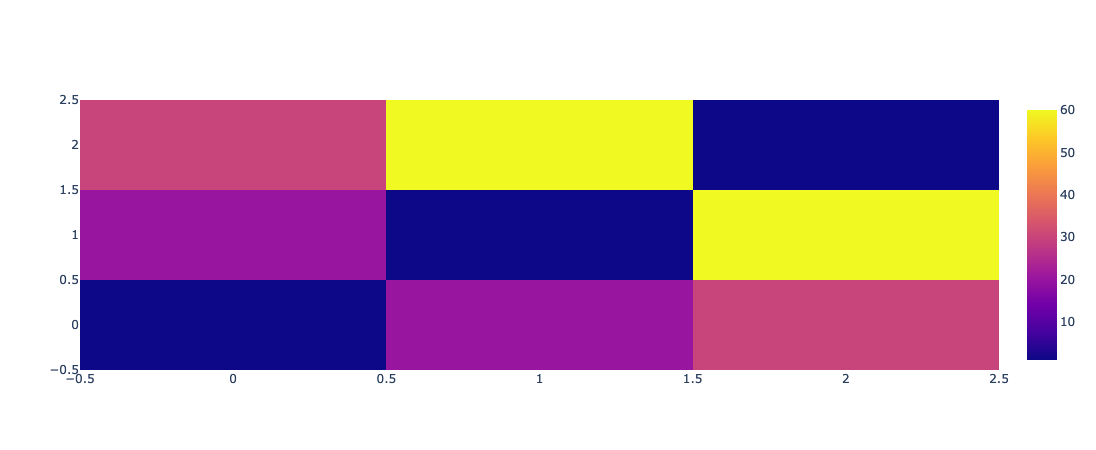

In [5]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                    z=[[1, 20, 30],
                      [20, 1, 60],
                      [30, 60, 1]]))
fig.show()

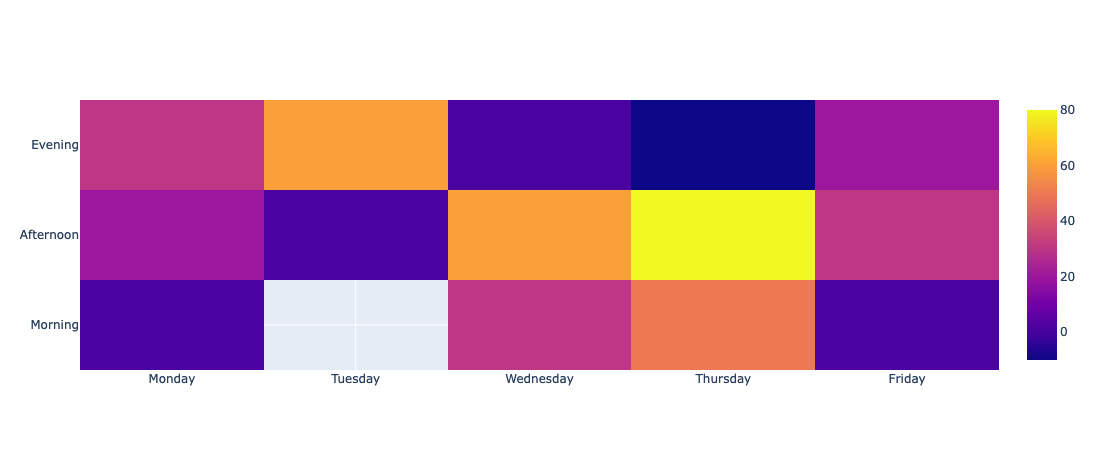

In [6]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=[[1, None, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                   y=['Morning', 'Afternoon', 'Evening'],
                   hoverongaps = False))
fig.show()

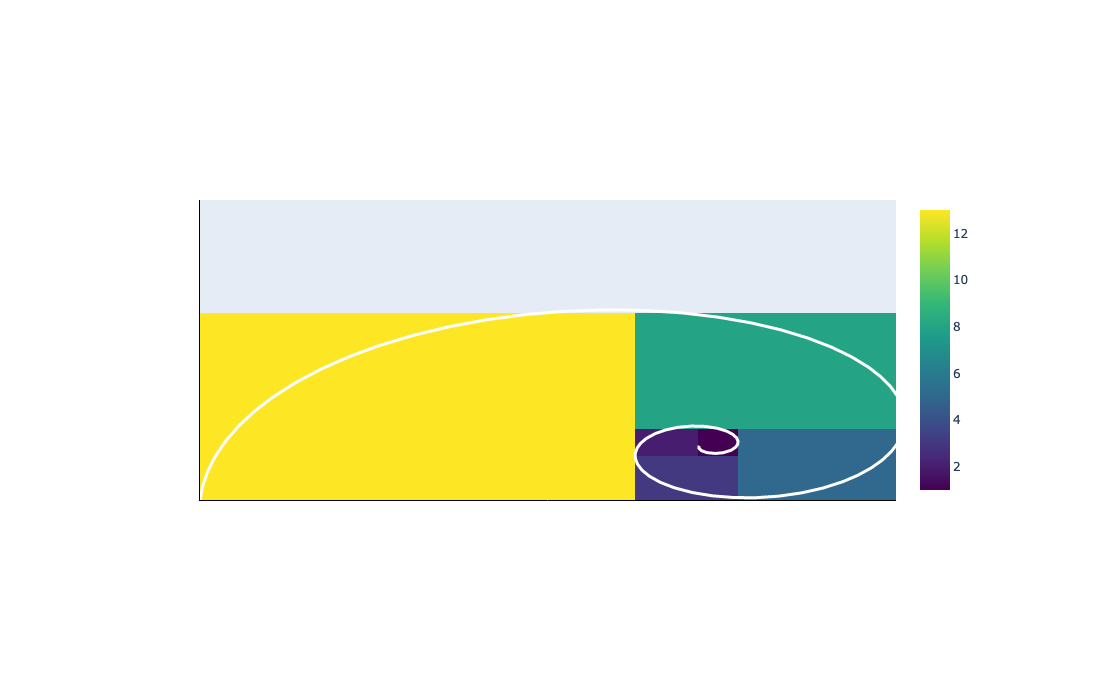

In [7]:
import plotly.graph_objects as go
import numpy as np

# Build the rectangles as a heatmap
# specify the edges of the heatmap squares
phi = (1 + np.sqrt(5) )/2. # golden ratio
xe = [0, 1, 1+(1/(phi**4)), 1+(1/(phi**3)), phi]
ye = [0, 1/(phi**3), 1/phi**3+1/phi**4, 1/(phi**2), 1]

z = [ [13,3,3,5],
      [13,2,1,5],
      [13,10,11,12],
      [13,8,8,8]
    ]

fig = go.Figure(data=go.Heatmap(
          x = np.sort(xe),
          y = np.sort(ye),
          z = z,
          type = 'heatmap',
          colorscale = 'Viridis'))

# Add spiral line plot

def spiral(th):
    a = 1.120529
    b = 0.306349
    r = a*np.exp(-b*th)
    return (r*np.cos(th), r*np.sin(th))

theta = np.linspace(-np.pi/13,4*np.pi,1000); # angle
(x,y) = spiral(theta)

fig.add_trace(go.Scatter(x= -x+x[0], y= y-y[0],
     line =dict(color='white',width=3)))

axis_template = dict(range = [0,1.6], autorange = False,
             showgrid = False, zeroline = False,
             linecolor = 'black', showticklabels = False,
             ticks = '' )

fig.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    xaxis = axis_template,
    yaxis = axis_template,
    showlegend = False,
    width = 700, height = 700,
    autosize = False )

fig.show()


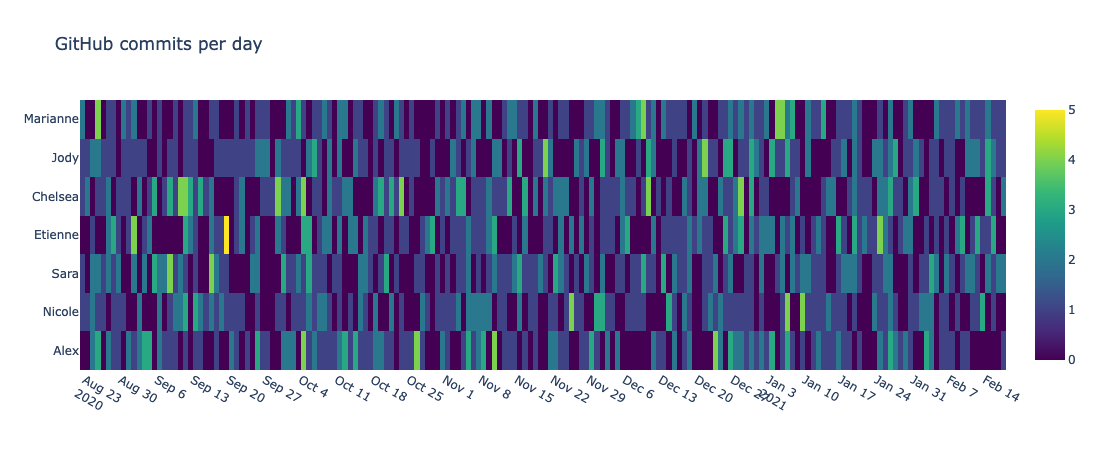

In [8]:
import plotly.graph_objects as go
import datetime
import numpy as np
np.random.seed(1)

programmers = ['Alex','Nicole','Sara','Etienne','Chelsea','Jody','Marianne']

base = datetime.datetime.today()
dates = base - np.arange(180) * datetime.timedelta(days=1)
z = np.random.poisson(size=(len(programmers), len(dates)))

fig = go.Figure(data=go.Heatmap(
        z=z,
        x=dates,
        y=programmers,
        colorscale='Viridis'))

fig.update_layout(
    title='GitHub commits per day',
    xaxis_nticks=36)

fig.show()

# Part 2: Radar Charts

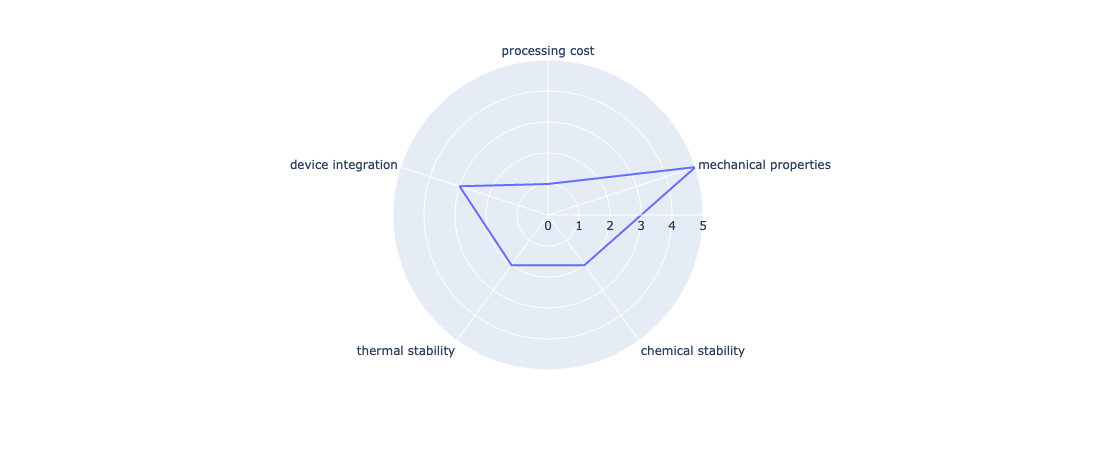

In [9]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()

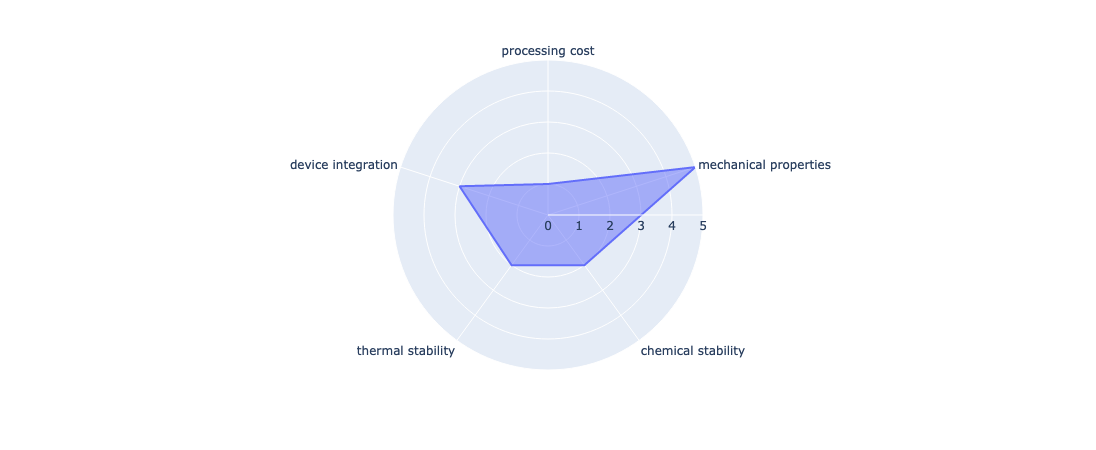

In [10]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

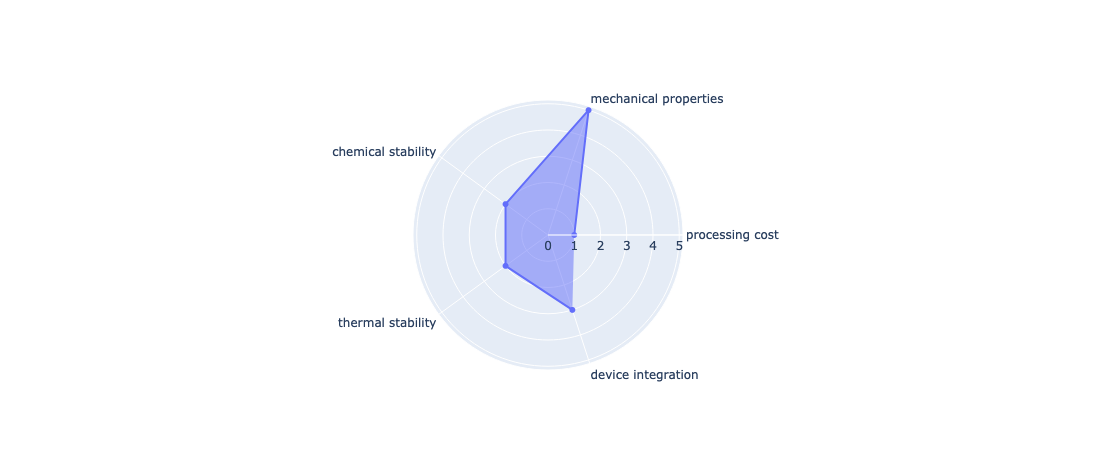

In [11]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r=[1, 5, 2, 2, 3],
  theta=['processing cost','mechanical properties','chemical stability', 'thermal stability',
           'device integration'],
  fill='toself'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False
)

fig.show()

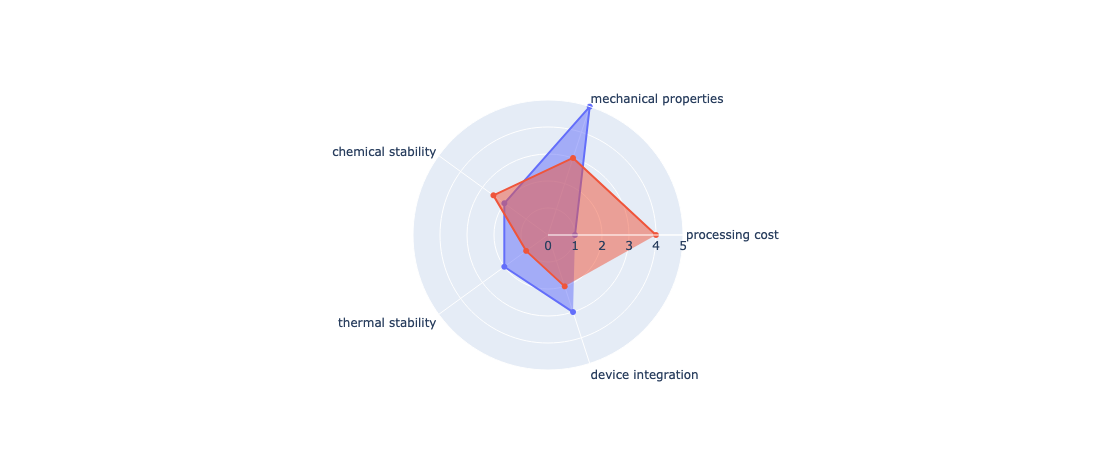

In [12]:
import plotly.graph_objects as go

categories = ['processing cost','mechanical properties','chemical stability',
              'thermal stability', 'device integration']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[1, 5, 2, 2, 3],
      theta=categories,
      fill='toself',
      name='Product A'
))
fig.add_trace(go.Scatterpolar(
      r=[4, 3, 2.5, 1, 2],
      theta=categories,
      fill='toself',
      name='Product B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

fig.show()

# Part 3: Log Plots

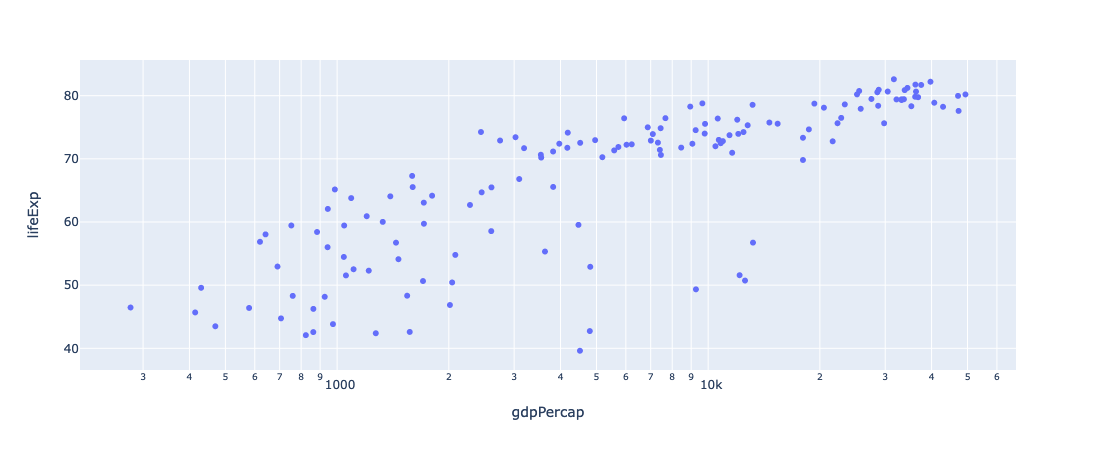

In [13]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")

fig = px.scatter(df, x="gdpPercap", y="lifeExp", hover_name="country", log_x=True)
fig.show()

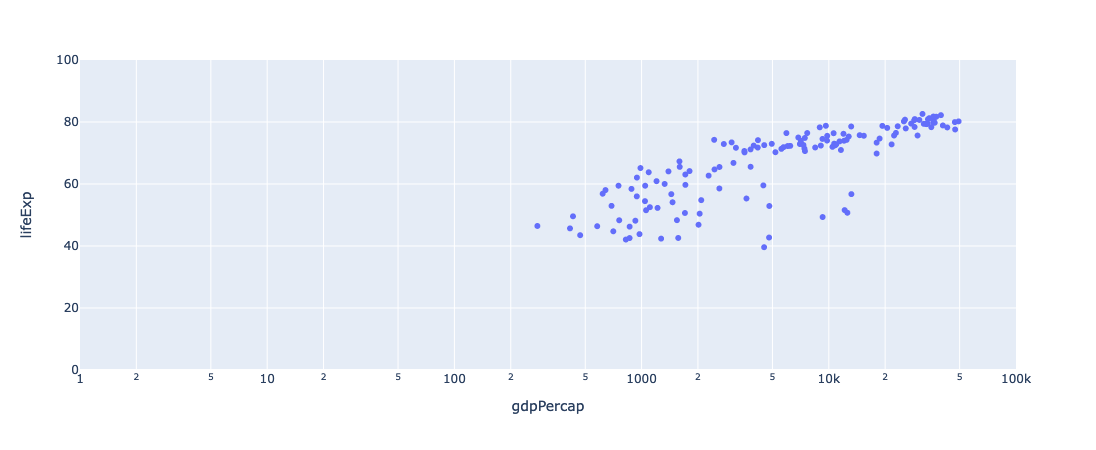

In [14]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")

fig = px.scatter(df, x="gdpPercap", y="lifeExp", hover_name="country", 
                 log_x=True, range_x=[1,100000], range_y=[0,100])
fig.show()

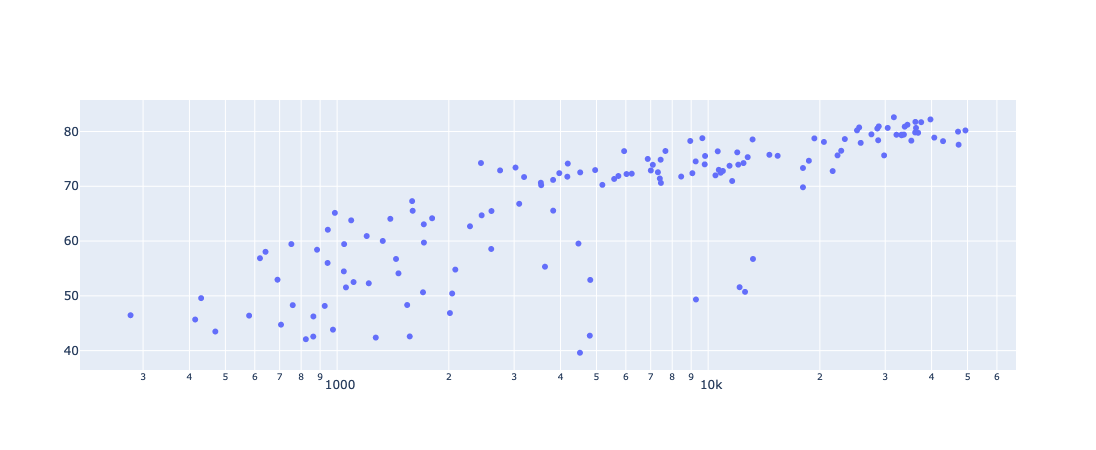

In [15]:
import plotly.graph_objects as go
import plotly.express as px
df = px.data.gapminder().query("year == 2007")

fig = go.Figure()

fig.add_trace(go.Scatter(mode="markers", x=df["gdpPercap"], y=df["lifeExp"] ))

fig.update_xaxes(type="log")
fig.show()

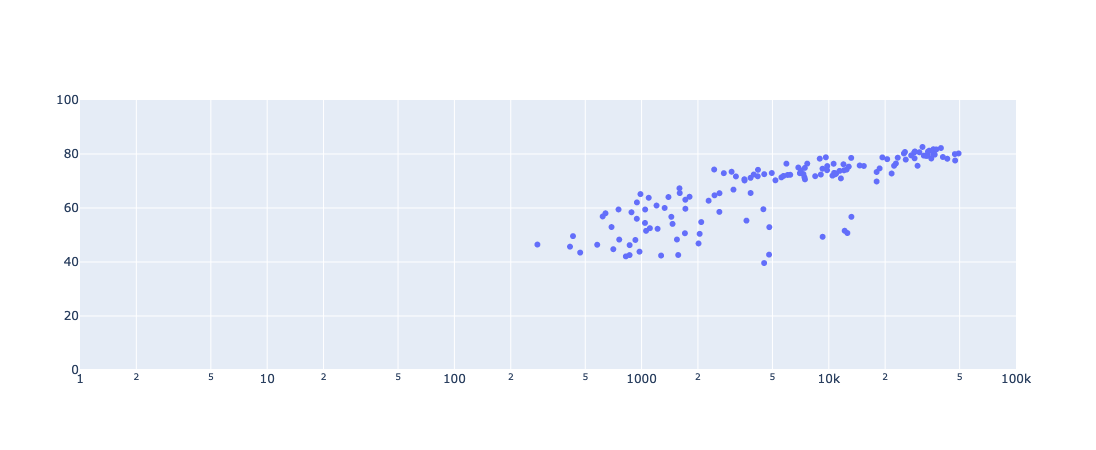

In [16]:
import plotly.graph_objects as go
import plotly.express as px
df = px.data.gapminder().query("year == 2007")

fig = go.Figure()

fig.add_trace(go.Scatter(mode="markers", x=df["gdpPercap"], y=df["lifeExp"] ))

fig.update_xaxes(type="log", range=[0,5]) # log range: 10^0=1, 10^5=100000
fig.update_yaxes(range=[0,100]) # linear range
fig.show()

# Part 4: Bubble Plots

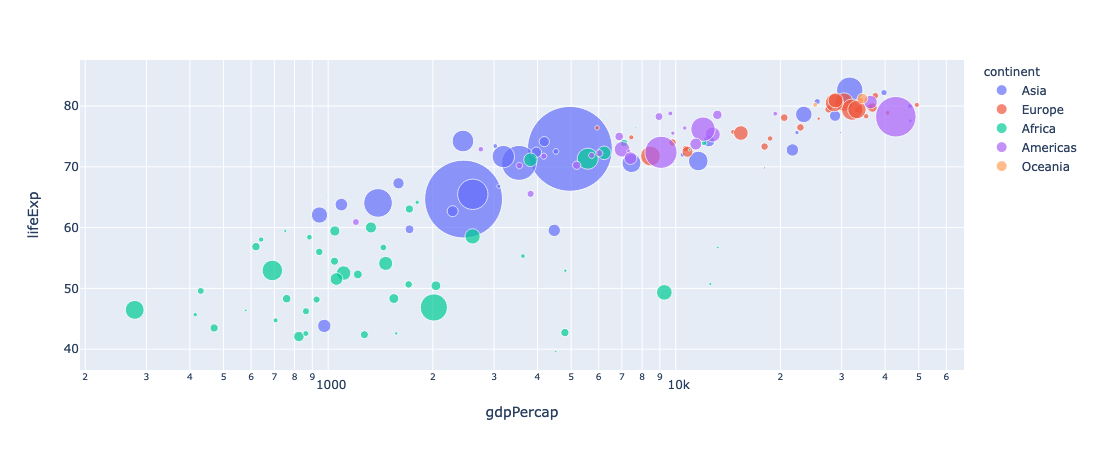

In [17]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
	        size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()


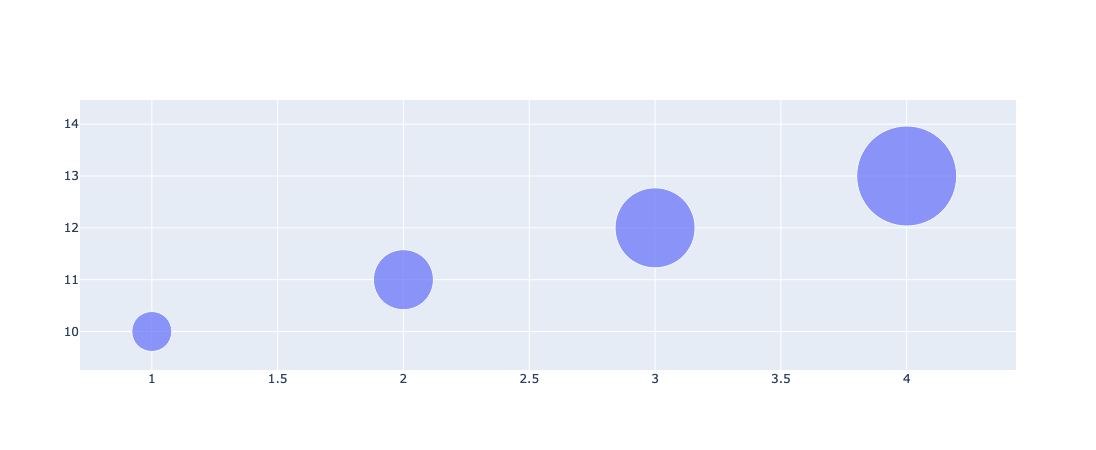

In [18]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=[1, 2, 3, 4], y=[10, 11, 12, 13],
    mode='markers',
    marker_size=[40, 60, 80, 100])
])

fig.show()

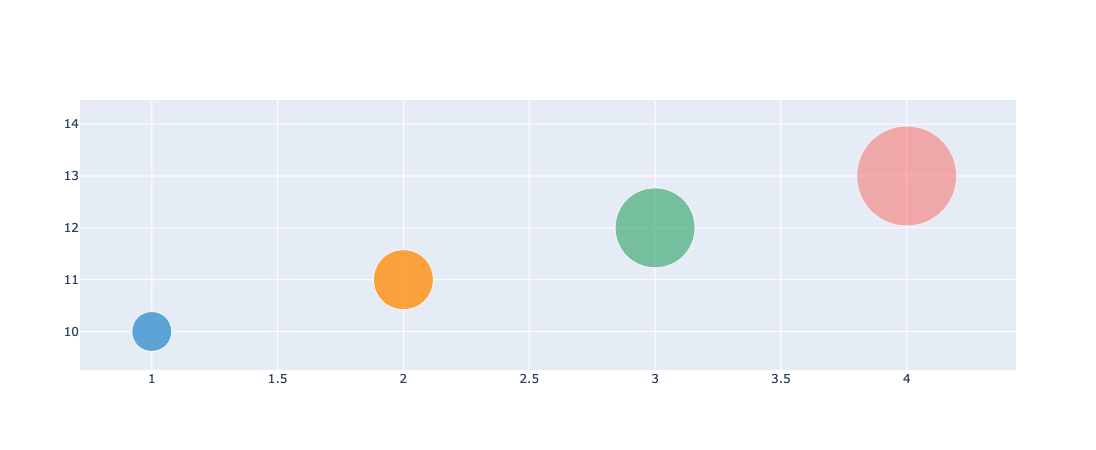

In [19]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=[1, 2, 3, 4], y=[10, 11, 12, 13],
    mode='markers',
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        opacity=[1, 0.8, 0.6, 0.4],
        size=[40, 60, 80, 100],
    )
)])

fig.show()

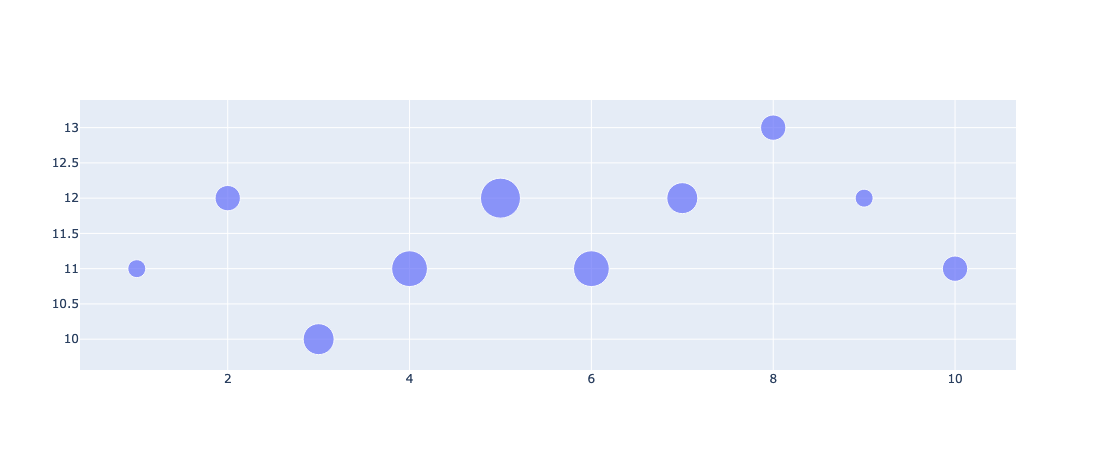

In [20]:
import plotly.graph_objects as go

size = [20, 40, 60, 80, 100, 80, 60, 40, 20, 40]
fig = go.Figure(data=[go.Scatter(
    x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    y=[11, 12, 10, 11, 12, 11, 12, 13, 12, 11],
    mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(40.**2),
        sizemin=4
    )
)])

fig.show()

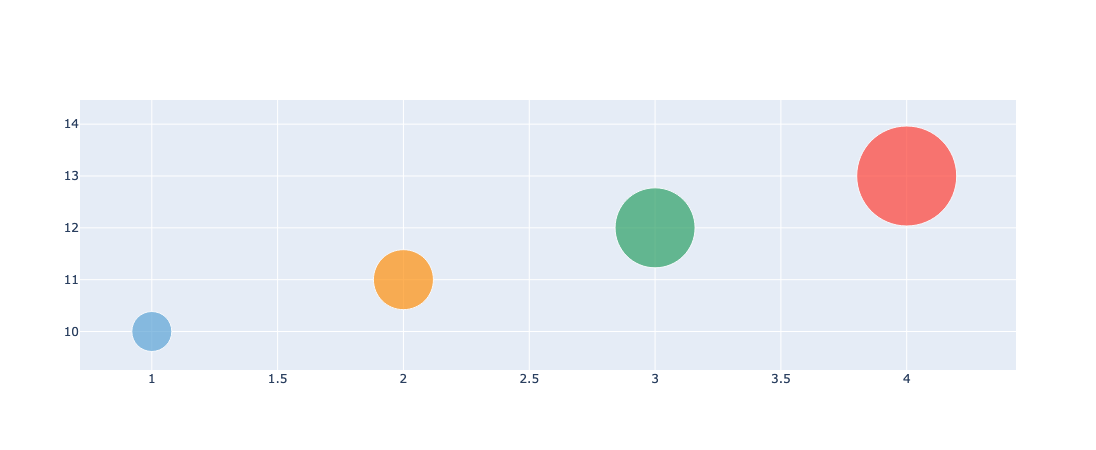

In [21]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=[1, 2, 3, 4], y=[10, 11, 12, 13],
    text=['A<br>size: 40', 'B<br>size: 60', 'C<br>size: 80', 'D<br>size: 100'],
    mode='markers',
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',  'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        size=[40, 60, 80, 100],
    )
)])

fig.show()

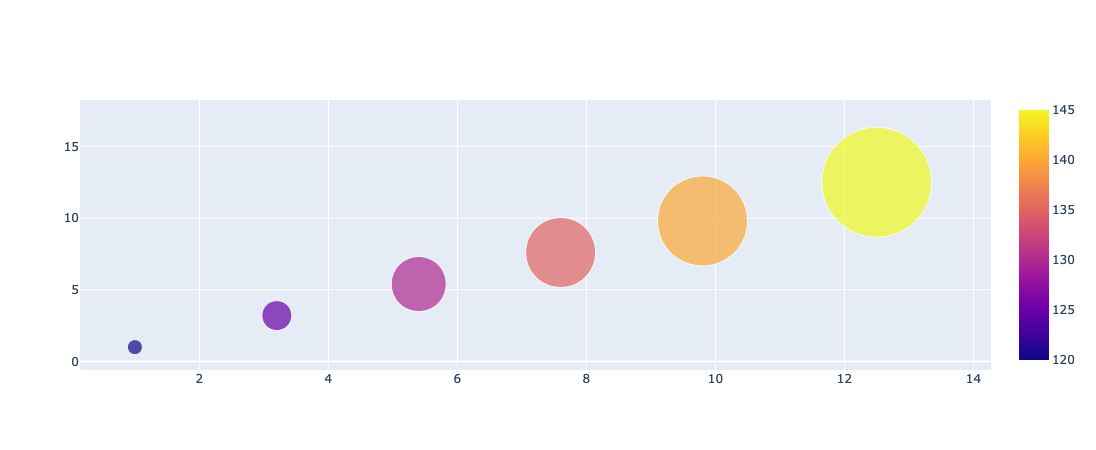

In [22]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x=[1, 3.2, 5.4, 7.6, 9.8, 12.5],
    y=[1, 3.2, 5.4, 7.6, 9.8, 12.5],
    mode='markers',
    marker=dict(
        color=[120, 125, 130, 135, 140, 145],
        size=[15, 30, 55, 70, 90, 110],
        showscale=True
        )
)])

fig.show()

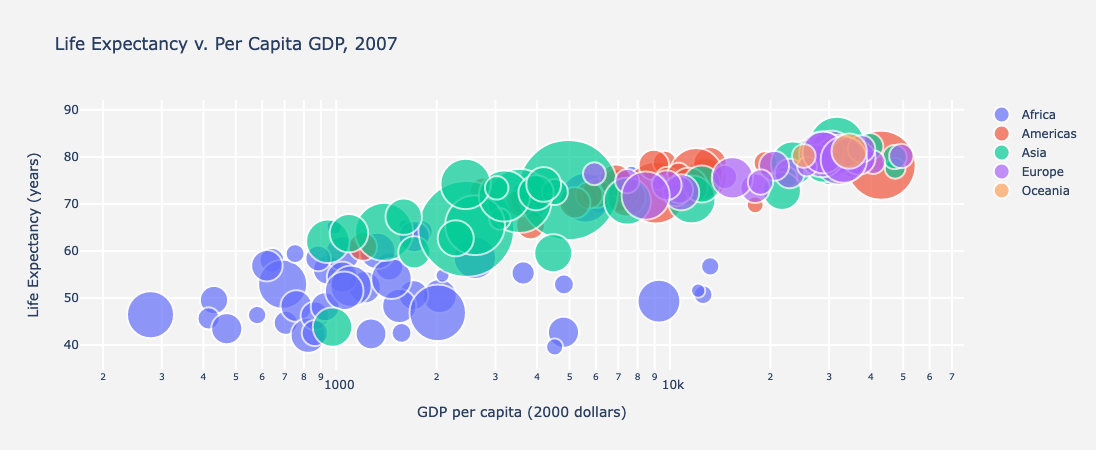

In [23]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import math

# Load data, define hover text and bubble size
data = px.data.gapminder()
df_2007 = data[data['year']==2007]
df_2007 = df_2007.sort_values(['continent', 'country'])

hover_text = []
bubble_size = []

for index, row in df_2007.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Life Expectancy: {lifeExp}<br>'+
                      'GDP per capita: {gdp}<br>'+
                      'Population: {pop}<br>'+
                      'Year: {year}').format(country=row['country'],
                                            lifeExp=row['lifeExp'],
                                            gdp=row['gdpPercap'],
                                            pop=row['pop'],
                                            year=row['year']))
    bubble_size.append(math.sqrt(row['pop']))

df_2007['text'] = hover_text
df_2007['size'] = bubble_size
sizeref = 2.*max(df_2007['size'])/(100**2)

# Dictionary with dataframes for each continent
continent_names = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
continent_data = {continent:df_2007.query("continent == '%s'" %continent)
                              for continent in continent_names}

# Create figure
fig = go.Figure()

for continent_name, continent in continent_data.items():
    fig.add_trace(go.Scatter(
        x=continent['gdpPercap'], y=continent['lifeExp'],
        name=continent_name, text=continent['text'],
        marker_size=continent['size'],
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Life Expectancy v. Per Capita GDP, 2007',
    xaxis=dict(
        title='GDP per capita (2000 dollars)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Life Expectancy (years)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()
